In [1]:
import ndjson

In [2]:
with open('Video_Games_5.json') as f:
    data = ndjson.load(f)

In [3]:
data[0:2]

[{'overall': 5.0,
  'verified': True,
  'reviewTime': '10 17, 2015',
  'reviewerID': 'A1HP7NVNPFMA4N',
  'asin': '0700026657',
  'reviewerName': 'Ambrosia075',
  'reviewText': "This game is a bit hard to get the hang of, but when you do it's great.",
  'summary': "but when you do it's great.",
  'unixReviewTime': 1445040000},
 {'overall': 4.0,
  'verified': False,
  'reviewTime': '07 27, 2015',
  'reviewerID': 'A1JGAP0185YJI6',
  'asin': '0700026657',
  'reviewerName': 'travis',
  'reviewText': 'I played it a while but it was alright. The steam was a bit of trouble. The more they move these game to steam the more of a hard time I have activating and playing a game. But in spite of that it was fun, I liked it. Now I am looking forward to anno 2205 I really want to play my way to the moon.',
  'summary': 'But in spite of that it was fun, I liked it',
  'unixReviewTime': 1437955200}]

In [4]:
import altair as alt
import pandas as pd

In [5]:
df = pd.DataFrame.from_dict(data)

In [6]:
df['overall'] = df['overall'].apply(lambda x: int(x))

In [7]:
alt.Chart(df[0:4000]).mark_bar().encode(
    alt.X("overall", bin=True),
    y='count()',
)

alt.Chart(...)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1358cc550>]],
      dtype=object)

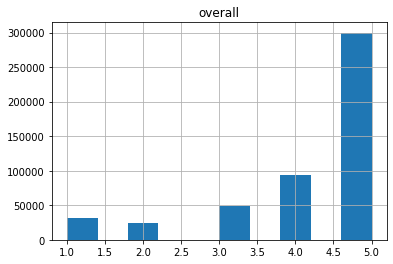

In [8]:
df.hist(column='overall')

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [11]:
Counter(df.overall)

Counter({5: 299759, 4: 93654, 3: 49146, 2: 24135, 1: 30883})

In [13]:
rus = RandomUnderSampler(random_state=42, sampling_strategy={5: 1500, 4: 500, 3: 500, 2: 500, 1: 1500})
X_resampled, y_resampled = rus.fit_resample(df, df.overall)
Counter(y_resampled)

Counter({1: 1500, 2: 500, 3: 500, 4: 500, 5: 1500})

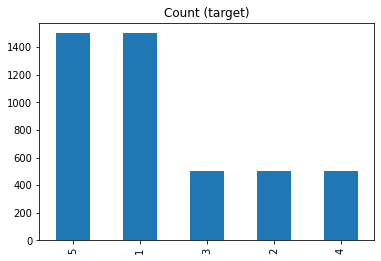

In [17]:
X_resampled.overall.value_counts().plot(kind='bar', title='Count (target)');

In [20]:
subsetDf = df.sample(100000, random_state=42)

In [26]:
X_resampled = X_resampled.rename(columns={"overall": "ratings", "reviewText": "reviews"})
subsetDf = subsetDf.rename(columns={"overall": "ratings", "reviewText": "reviews"})

In [29]:
X_resampled.to_csv('small_corpus.csv', columns=['ratings', 'reviews'])
subsetDf.to_csv('big_corpus.csv', columns=['ratings', 'reviews'])